# 4.10 IC Profile Income

### This script contains the following points: <br> <br> 
1. Importing Libraries <br> <br> 
2. Importing Data Sets <br> <br> 
3. Data Checks <br><br>
4. Profiling Variable: Income <br>
 > 04.01 Distribution of Profiles <br>
 > 04.02 Descriptive Statistics for each profiled segment <br>
 > 04.03 Relationship with profiles and regions / departments <br>

## 01 Import Libraries

In [1]:
# Import Libraries with visualization capabilities
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


## 02 Import Data

In [2]:
# First create a string of the path for the main project folder
path = r'/Users/mistystone/Library/CloudStorage/OneDrive-Personal/Documents/CF_Data_Ach4_Python/2023-05_Instacart_Basket_Analysis/'

In [3]:
# Import pickle files
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','high_activity_customers.pkl')) 

## 03 Data Checks

In [4]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequent_flag,gender,state,age,date_joined,number_dependents,family_status,income,region,low_activity_flag
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN


In [5]:
df.shape

(30964564, 32)

<Axes: ylabel='Frequency'>

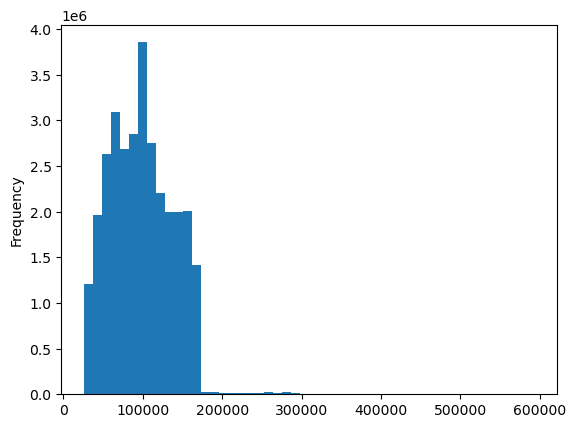

In [6]:
#histogram 
df['income'].plot.hist(bins = 50) 

In [7]:
df[['income']].describe()

,income
count,3.096456e+07
mean,9.967587e+04
std,4.314187e+04
min,2.590300e+04
25%,6.729200e+04
50%,9.676500e+04
75%,1.281020e+05
max,5.939010e+05


## 04 Profiling Variable: Income

In [8]:
# Create profile variable for Low Income
df.loc[(df['income'] <= 67292),'profile_income'] = "Low"

In [9]:
# Create profile variable for Low Middle Income
df.loc[(df['income'] >= 67293) & (df['income'] <=96765),'profile_income'] = "Low Middle"

In [10]:
# Create profile variable for High Middle Income
df.loc[(df['income'] >= 96766) & (df['income'] <=128102),'profile_income'] = "High Middle"

In [11]:
# Create profile variable for High Income
df.loc[(df['income'] >= 128103),'profile_income'] = "High"

In [12]:
# Check counts
df['profile_income'].value_counts(dropna = False)

Low            7741348
Low Middle     7741243
High           7741091
High Middle    7740882
Name: profile_income, dtype: int64

### 04.01 Distribution of Profiles

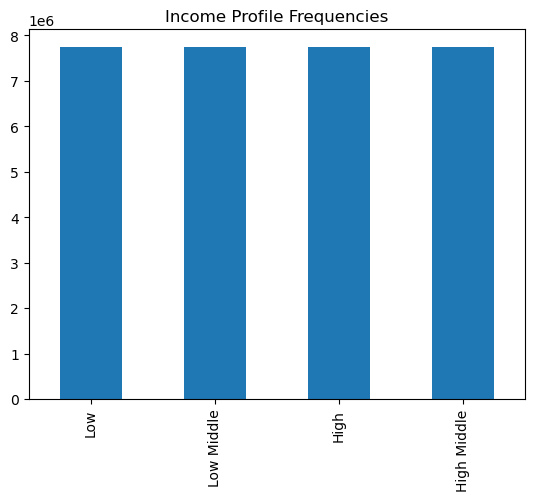

In [13]:
# Bar graph by profiled segment
bar_profile_income = df['profile_income'].value_counts().plot.bar(title='Income Profile Frequencies')

In [16]:
# Export bar chart
bar_profile_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_income.png'),bbox_inches='tight')

### 04.02 Descriptive Statistics for each profiled segment

In [17]:
# Comparing mean, min, max for each profile group
df.groupby('profile_income').agg({'prices': ['mean','min','max']})

prices           
                    mean  min   max
profile_income                     
High            7.950711  1.0  25.0
High Middle     7.959911  1.0  25.0
Low             7.300463  1.0  25.0
Low Middle      7.951395  1.0  25.0

In [18]:
# Comparing the total of prices for each profile group
df.groupby('profile_income').agg({'prices': ['sum']})

,prices
,sum
profile_income,
High,61514320.3
High Middle,61612512.7
Low,56515384.9
Low Middle,61552017.7


In [19]:
df.groupby('profile_income').agg({'order_number': ['mean','min','max']})

order_number        
                       mean min max
profile_income                     
High              17.940407   1  99
High Middle       17.827705   1  99
Low               17.476926   1  99
Low Middle        18.091535   1  99

### 04.03 Relationship with profiles and regions / departments

In [20]:
# Check counts
df['region'].value_counts(dropna = False)

South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: region, dtype: int64

In [21]:
# Check counts
df['department_id'].value_counts(dropna = False).sort_index()

1     2121731
2       34411
3     1120828
4     9079273
5      144627
6      255991
7     2571901
8       93060
9      822136
10      33451
11     424306
12     674781
13    1782705
14     670850
15    1012074
16    5177182
17     699857
18     410392
19    2766406
20    1003834
21      64768
Name: department_id, dtype: int64

#### 04.03.01 Relationship with profiles and departments

In [22]:
crosstab_depts = pd.crosstab(df['department_id'], df['profile_income'], dropna = False)
crosstab_depts

profile_income,High,High Middle,Low,Low Middle
department_id,,,,
1,541072,533745,511069,535845
2,8711,8523,8579,8598
3,290423,284311,264827,281267
4,2289572,2332281,2124762,2332658
5,40862,33638,36825,33302
6,65340,65831,57727,67093
7,618517,607427,743205,602752
8,24944,24152,21752,22212
9,212921,215464,179995,213756


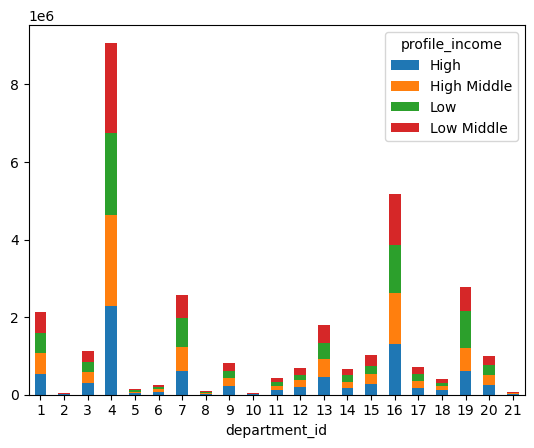

In [23]:
# Create a stacked bar chart of this data.
bar_profile_income_depts = crosstab_depts.plot.bar(rot = 0, stacked = True)

In [24]:
# Export bar chart
bar_profile_income_depts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_income_depts.png'))

#### 04.03.02 Relationship with profiles and regions

In [25]:
crosstab_regions = pd.crosstab(df['region'], df['profile_income'], dropna = False)
crosstab_regions

profile_income,High,High Middle,Low,Low Middle
region,,,,
Midwest,1841838,1851333,1790670,1777672
Northeast,1372838,1369080,1367074,1355693
South,2549267,2528205,2593563,2640104
West,1977148,1992264,1990041,1967774


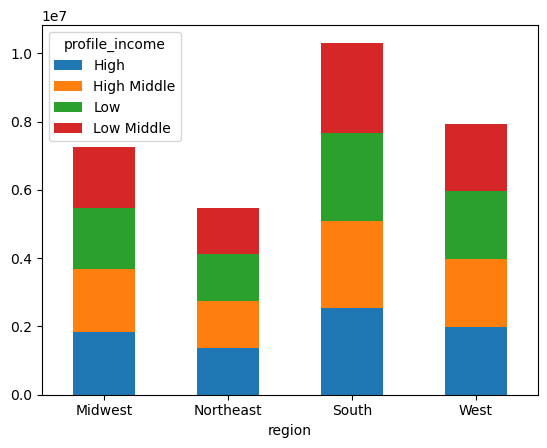

In [26]:
# Create a stacked bar chart of this data.
bar_profile_income_regions = crosstab_regions.plot.bar(rot = 0, stacked = True)

In [27]:
# Export bar chart
bar_profile_income_regions.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_income_regions.png'))